# Rimon Melamed
## CSCI6364
## HW1

In [1]:
import csv 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Pre-processing: import the data
data_arr = []

with open('data_mnist.csv') as csv_file:
    data_reader = csv.reader(csv_file, delimiter=',')
    for row in data_reader:
        data_arr.append(row)

In [3]:
# Get the labels for the dataset
digits = np.array([e[0] for e in data_arr[1::]])

In [4]:
# Transform the 1D arrays into 28x28 np image arrays
img_list  = [np.array(e[1::], dtype='uint8') for e in data_arr[1::]]
imgs = [np.reshape(e, (28, 28)) for e in img_list]

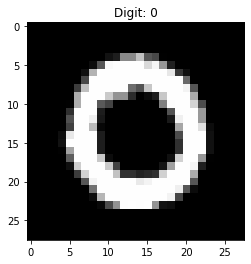

In [5]:
# Show sample image in training data
plt.title('Digit: ' + digits[1])
plt.imshow(imgs[1], cmap='gray')

In [6]:
# Scale the images to be standardized

scaler = StandardScaler()
scaled_imgs = np.array([scaler.fit_transform(e) for e in imgs])

In [7]:
# Split the training data into the training/test data 
(train_imgs, test_imgs, train_digits, test_digits) = train_test_split(scaled_imgs, digits, test_size=.25, random_state=42)
train_imgs = train_imgs.reshape((train_imgs.shape[0], train_imgs.shape[1] * train_imgs.shape[2]))
test_imgs = test_imgs.reshape((test_imgs.shape[0], test_imgs.shape[1] * test_imgs.shape[2]))

In [ ]:
# We will try different k values and see how they perform empirically...
mean_accuracies = []

for k in range(1, 50):
    model = KNeighborsClassifier(k)
    model.fit(train_imgs, train_digits)
    #s = model.score(train_imgs, train_digits)
    #test = model.score(test_imgs, test_digits)
    mean_accuracies.append(model.score(test_imgs, test_digits))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),mean_accuracies,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Mean Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean Accuracy')

In [ ]:
k = 5
model = KNeighborsClassifier(k)
model.fit(train_imgs, train_digits)

In [ ]:
# Import test data
test_arr = []

with open('test_mnist.csv') as csv_file:
    data_reader = csv.reader(csv_file, delimiter=',')
    for row in data_reader:
        test_arr.append(row)

In [ ]:
# Get the test data ready for scoring
img_list  = [np.array(e, dtype='uint8') for e in test_arr[1::]]
imgs = [np.reshape(e, (28, 28)) for e in img_list]
scaled_imgs = np.array([scaler.fit_transform(e) for e in imgs])
test_imgs = scaled_imgs.reshape((scaled_imgs.shape[0], scaled_imgs.shape[1] * scaled_imgs.shape[2]))

In [ ]:
results = model.predict(test_imgs)

In [ ]:
# Write results to file 
f = open("results.dat", "w")
f.write("ImageID, Label\n")
i = 1
for e in results:
    f.write(str(i) + ", " + e + "\n")
    i += 1
    
f.close()

# Results

In order to evaluate my kNN model, and also select an optimal $k$ value, I first iterated over a reasonable amount of $k$ values, trained the split training data on them, and plotted/evaluated the mean accuracy vs the $k$ value. I chose $k$ in the range of $1-50$ since, as a good rule of thumb, $k < sqrt(n)$, and since we have approximately $32,000$ training samples (when taking $75\%$ of the training samples, as the other $25\%$ is used for testing in the split data), this seems reasonable. 

